In [2]:
from pymongo import MongoClient
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize
from gensim import corpora
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
from gensim.models import CoherenceModel, LdaModel, LsiModel, HdpModel

import pyLDAvis.gensim_models
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
import gensim
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import emoji
import pickle
import string


/home/tsbh/anaconda3/lib/python3.9/site-packages/seaborn/rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
/home/tsbh/anaconda3/lib/python3.9/site-packages/setuptools/_distutils/version.py:351: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


In [3]:
df=pd.read_excel("data_training_lexicon1.xlsx",0)
df

,Unnamed: 0,Cleaned_Text
0,0,ngeri dar awal kpu bukan wasit yang baik pante...
1,1,rkuhp buat nyali kurang
2,2,pasalpasal rkuhp lebih bahaya belum syariahmew...
3,3,UU omnibuslaw saja sahkan apa rkuhp
4,4,enggan perintah buka draf baru rkuhp nilai tun...
...,...,...
4996,4996,laku bom bunuh diri polsek astana anyar bawa b...
4997,4997,benar beberapa rkuhp ganti ganti sih
4998,4998,lord rangga tinggal tepat sah nya rkuhp apa ma...
4999,4999,list jadi minggu awal desember gempa bom bunuh...


In [4]:
df=pd.DataFrame(df)
df

,Unnamed: 0,Cleaned_Text
0,0,ngeri dar awal kpu bukan wasit yang baik pante...
1,1,rkuhp buat nyali kurang
2,2,pasalpasal rkuhp lebih bahaya belum syariahmew...
3,3,UU omnibuslaw saja sahkan apa rkuhp
4,4,enggan perintah buka draf baru rkuhp nilai tun...
...,...,...
4996,4996,laku bom bunuh diri polsek astana anyar bawa b...
4997,4997,benar beberapa rkuhp ganti ganti sih
4998,4998,lord rangga tinggal tepat sah nya rkuhp apa ma...
4999,4999,list jadi minggu awal desember gempa bom bunuh...


In [5]:
df=df[['Cleaned_Text']]
df

,Cleaned_Text
0,ngeri dar awal kpu bukan wasit yang baik pante...
1,rkuhp buat nyali kurang
2,pasalpasal rkuhp lebih bahaya belum syariahmew...
3,UU omnibuslaw saja sahkan apa rkuhp
4,enggan perintah buka draf baru rkuhp nilai tun...
...,...
4996,laku bom bunuh diri polsek astana anyar bawa b...
4997,benar beberapa rkuhp ganti ganti sih
4998,lord rangga tinggal tepat sah nya rkuhp apa ma...
4999,list jadi minggu awal desember gempa bom bunuh...


In [6]:
df = df.rename(columns={"Cleaned_Text": "caption"})
df

,caption
0,ngeri dar awal kpu bukan wasit yang baik pante...
1,rkuhp buat nyali kurang
2,pasalpasal rkuhp lebih bahaya belum syariahmew...
3,UU omnibuslaw saja sahkan apa rkuhp
4,enggan perintah buka draf baru rkuhp nilai tun...
...,...
4996,laku bom bunuh diri polsek astana anyar bawa b...
4997,benar beberapa rkuhp ganti ganti sih
4998,lord rangga tinggal tepat sah nya rkuhp apa ma...
4999,list jadi minggu awal desember gempa bom bunuh...


In [7]:
df

,caption
0,ngeri dar awal kpu bukan wasit yang baik pante...
1,rkuhp buat nyali kurang
2,pasalpasal rkuhp lebih bahaya belum syariahmew...
3,UU omnibuslaw saja sahkan apa rkuhp
4,enggan perintah buka draf baru rkuhp nilai tun...
...,...
4996,laku bom bunuh diri polsek astana anyar bawa b...
4997,benar beberapa rkuhp ganti ganti sih
4998,lord rangga tinggal tepat sah nya rkuhp apa ma...
4999,list jadi minggu awal desember gempa bom bunuh...


In [8]:
df['caption'].replace('', np.nan, inplace=True)

In [9]:
df.dropna(subset=['caption'], inplace=True)

In [10]:
df

,caption
0,ngeri dar awal kpu bukan wasit yang baik pante...
1,rkuhp buat nyali kurang
2,pasalpasal rkuhp lebih bahaya belum syariahmew...
3,UU omnibuslaw saja sahkan apa rkuhp
4,enggan perintah buka draf baru rkuhp nilai tun...
...,...
4996,laku bom bunuh diri polsek astana anyar bawa b...
4997,benar beberapa rkuhp ganti ganti sih
4998,lord rangga tinggal tepat sah nya rkuhp apa ma...
4999,list jadi minggu awal desember gempa bom bunuh...


In [11]:
tknzr = TweetTokenizer()

def tokenize(text):
    lda_tokens = []
    tokens = tknzr.tokenize(text)
    for token in tokens:
        lda_tokens.append(token)
    return lda_tokens

def prepare_text_for_lda(text):
    tokens = tokenize(text)
    return tokens

In [12]:
for data in df["caption"]:
    tokens = prepare_text_for_lda(data)
    print(tokens)

['ngeri', 'dar', 'awal', 'kpu', 'bukan', 'wasit', 'yang', 'baik', 'pantesan', 'buru', 'gol', 'rkuhp', 'presiden', 'yang', 'lahir', 'curang', 'aman']
['rkuhp', 'buat', 'nyali', 'kurang']
['pasalpasal', 'rkuhp', 'lebih', 'bahaya', 'belum', 'syariahmewujudkanpersatuan']
['UU', 'omnibuslaw', 'saja', 'sahkan', 'apa', 'rkuhp']
['enggan', 'perintah', 'buka', 'draf', 'baru', 'rkuhp', 'nilai', 'tunjuk', 'bbc']
['nah', 'kamu', 'yang', 'benar', 'saja', 'sudah', 'fitnah', 'jatohnya', 'terkena', 'pasal', 'rkuhp', 'baru', 'hina', 'presiden', 'tambah', 'tindak', 'pidana', 'terorisme', 'jelas', 'dukung', 'gera', 'terorisme', 'orochi', 'm', 'top']
['maling', 'bintang', 'emon', 'vs', 'mamat', 'alkatiri', 'resiko', 'kritik', 'perintah', 'rkuhp', 'via']
['rkuhp']
['harus', 'sih', 'sadar', 'ta', 'tapi', 'ntah', 'lh', 'mungkin', 'belum', 'baca', 'rkuhp', 'yang', 'baru', 'ganggu', 'tetangga']
['salut', 'pasang', 'connect', 'zenly', 'larang', 'nongkrong', 'lawan', 'jenis', 'saling', 'tukar', 'password', 'ig',

['nak', 'rkuhp', 'untuk', 'hukum', 'korupsi', 'kalian', 'kasih', 'diskon']
['atur', 'kuhp', 'baru', 'sandiaga', 'uno', 'pasti', 'kapolri', 'wisatawan', 'tak', 'ganggu', 'bhpsemarang', 'kumhampasti', 'kumhamsemakinpasti', 'kumham', 'kemenkumham', 'kemenkumhamri', 'beritaterkini', 'twitter', 'news', 'breakingnews', 'kuhp', 'rkuhp']
['menparekraf', 'koordinasi', 'terap', 'kuhp', 'baru', 'kapolri', 'bhpsemarang', 'kumhampasti', 'kumhamsemakinpasti', 'kumham', 'kemenkumham', 'kemenkumhamri', 'beritaterkini', 'twitter', 'news', 'breakingnews', 'semakinpasti', 'kuhp', 'rkuhp']
['sandiaga', 'minta', 'turis', 'tak', 'perlu', 'khawatir', 'pasal', 'zina', 'UU', 'kuhp', 'bhpsemarang', 'kumhampasti', 'kumhamsemakinpasti', 'kumham', 'kemenkumham', 'kemenkumhamri', 'beritaterkini', 'twitter', 'news', 'breakingnews', 'semakinpasti', 'kuhp', 'rkuhp', 'wisman']
['masyarakat', 'tempuh', 'uji', 'legislatif', 'kuhp', 'dpr', 'pesimistis', 'uji', 'materi', 'mk', 'bhpsemarang', 'kumhampasti', 'kumhamsemakinpa

['yang', 'disain', 'rkuhp', 'terus', 'suruh', 'ganti', 'perpuya', 'sami', 'mawondia', 'keluar', 'perpu', 'materi', 'sama', 'dg', 'UU', 'kaluan', 'mau', 'apamestinya', 'kondisten', 'cabut', 'rkuhpartinya', 'tetap', 'pakai', 'yang', 'lama']
['yeppp', 'banyak', 'yang', 'salah', 'tangkap', 'tntng', 'rkuhp']
['menkumham', 'yasonna', 'minta', 'maaf', 'proses', 'rkuhp', 'kurang']
['UU', 'kuhp', 'baru', 'sah', 'tuai', 'pro', 'kontra', 'salah', 'satu', 'pasal', 'demonstrasi', 'pasal', 'khawatir', 'halang', 'bebas', 'masyarakat', 'sampai', 'aspirasi', 'lalu', 'unjuk', 'rasa', 'kuhp', 'rkuhp', 'dprri', 'kontroversi', 'prokontra', 'unjukrasa', 'demo', 'demonstrasi']
['urgensi', 'kesah', 'rkuhp', 'cipta', 'hukum', 'modern', 'jokowipresidenku', 'pembangunanuntukrakyat', 'presidenjokowihebat', 'jokowimembangunnegeri', 'jokowimajubersamaindonesia', 'jokowibapakinfrastruktur']
['urgensi', 'kesah', 'rkuhp', 'cipta', 'hukum', 'modern', 'jokowipresidenku', 'pembangunanuntukrakyat', 'presidenjokowihebat', 

['samasama', 'dukung', 'berantas', 'korupsi', 'indonesia', 'bersih', 'lebih', 'maju', 'ps', 'posting', 'beberapa', 'cuplik', 'cakap', 'master', 'corbuzier', 'bila', 'kenan', 'tonton', 'utuh', 'silah', 'kanal', 'youtube', 'master', 'corbuzier', 'yasonnalaoly', 'kuhp', 'rkuhp', 'kumhampasti']
['ancam', 'hukum', 'minimal', 'naik', 'asas', 'adil', 'pejabatpenyelenggara', 'negara', 'milik', 'power', 'ancam', 'hukum', 'minimal', 'lebih', 'ringan', 'laku', 'korupsi', 'swasta', 'kumhamsemakinpasti', 'kumhampasti', 'yasonna', 'kuhp', 'rkuhp', 'podcast', 'kemenkumhamri']
['ancam', 'hukum', 'minimal', 'jabat', 'negara', 'korupsi', 'naik', 'belum', 'minimal', 'ancam', 'hukum', 'satu', 'tahun', 'UU', 'kuhp', 'anyar', 'naik', 'jadi', 'tahun', 'ancam', 'hukum', 'minimal', 'bukan', 'maksimal', 'kumhampasti', 'kuhp', 'rkuhp', 'yasonna', 'kumhamsemakinpasti', 'podcast']
['perintah', 'ri', 'berani', 'komplen', 'kayak', 'kemarin', 'bule', 'protes', 'rkuhp']
['sosialisasi', 'diskusi', 'publik', 'terkena', 

['rentenir', 'kriminal', 'pengacarakokojosephirianto', 'fyp', 'fyp', 'rkuhp', 'kuhpbaru', 'viral', 'acara', 'lawyer', 'advokat', 'kji', 'hukum', 'hukumindonesia', 'atur', 'penjara', 'rentenir', 'tidakizin', 'hutang', 'hutangpiutang', 'capcut']
['rkuhp', 'sah', 'semua', 'terkena', 'lewat', 'covid', 'senin', 'desember', 'tinggal', 'malam', 'sering', 'keramas', 'putri', 'candrawathi', 'larang', 'kemenkeu', 'laptop', 'sekte', 'ngabalin', 'liga', 'indonesia', 'maroko', 'semuabisakena', 'semuabisakena']
['justru', 'rakyat', 'yang', 'sana', 'kompak', 'bangkit', 'tidak', 'tindas', 'lawan', 'ketidakadilan', 'hukum', 'dg', 'rkuhp', 'tersebut', 'otomatis', 'bebas', 'dapat', 'bungkam', 'ham', 'abaikan', 'keritik', 'anggap', 'hina', 'miris']
['rkuhp', 'sah', 'indonesia', 'nilai', 'patut', 'bangga']
['semoga', 'rkuhp', 'baru', 'buka', 'investasi', 'baru', 'seta', 'potensi', 'tutup', 'sektor', 'pariwisata', 'investasi', 'bisnis', 'moral']
['rkuhp', 'sah', 'indonesia', 'nilai', 'patut', 'bangga']
['rk

['usai', 'layang', 'kritik', 'rkuhp', 'hotman', 'paris', 'hutapea', 'sampai', 'hak', 'jawab']
['dewan', 'pers', 'perintah', 'dpr', 'cabut', 'demokrasi', 'lewat', 'rkuhp', 'nah', 'lho', 'tumbangkanpenguasakemaruk', 'tumbangkanpenguasakemaruk']
['tak', 'pihak', 'rakyat', 'cabut', 'pasal', 'rkuhp', 'tumbangkanpenguasakemaruk', 'tumbangkanpenguasakemaruk', 'lewat']
['akademisi', 'soal', 'rkuhp', 'sah', 'rezim', 'tak', 'punya', 'telinga', 'kian', 'otoriter', 'tumbangkanpenguasakemaruk', 'tumbangkanpenguasakemaruk']
['apkh', 'bisa', 'dimasukkin', 'rkuhp', 'wkwk']
['giat', 'rkuhp', 'kemarin', 'dududududu']
['komnas', 'perempuan', 'anggap', 'kuhp', 'baru', 'sah', 'potensi', 'lahir', 'kriminalisasi', 'yang', 'lebih', 'perempuan', 'data', 'evello', 'tunjuk', 'pandang', 'jadi', 'salah', 'satu', 'isu', 'warna', 'jalan', 'rkuhp', 'jadi', 'kuhp']
['rkuhp', 'luar', 'biasa', 'prof']
['rkuhp', 'sesuai', 'dengann', 'ham', 'demiperkuatekonomiri']
['rkuhp', 'sesuai', 'ham', 'demiperkuatekonomiri']
['top',

['gin', 'cara', 'kampanye', 'tuk', 'simpati', 'rakyat', 'mending', 'tunjuk', 'kualitas', 'kerja', 'jgn', 'sprti', 'kmrn', 'depan', 'publik', 'sok', 'protes', 'rkuhp', 'trnyata', 'dlm', 'sudah', 'ttd', 'tuju']
['resah', 'kalang', 'pers', 'smsi', 'gugat', 'kesah', 'rkuhp']
['tanggap', 'mahfud', 'md', 'soal', 'pasal', 'zina', 'rkuhp', 'bhpsemarang', 'kumhampasti', 'kamipasti', 'kumhamsemakinpasti', 'kumham', 'kemenkumham', 'kemenkumhamri', 'semakinpasti', 'beritaterkini', 'twitter', 'socialmedia', 'berita', 'hukum', 'kuhp', 'rkuhp']
['sandiaga', 'uno', 'terjun', 'tim', 'atas', 'travel', 'warning', 'pasca', 'rkuhp', 'sah', 'bhpsemarang', 'kumhampasti', 'kamipasti', 'kumhamsemakinpasti', 'kumham', 'kemenkumham', 'kemenkumhamri', 'semakinpasti', 'beritaterkini', 'twitter', 'socialmedia']
['jubir', 'rkuhp', 'tanggap', 'pbb', 'tak', 'benar', 'kuhp', 'baru', 'bilang', 'tak', 'sesuai', 'ham', 'bhpsemarang', 'kumhampasti', 'kamipasti', 'kumhamsemakinpasti', 'kumham', 'kemenkumham', 'kemenkumhamri

['kait', 'kesah', 'rkuhp', 'menparekraf', 'ri', 'minta', 'wisatawan', 'manancanegara', 'tak', 'ragu', 'kunjung', 'indonenesia', 'selebriti', 'insider']
['maruf', 'amin', 'menghimbau', 'semua', 'pihak', 'bijaksana', 'hadap', 'kesah', 'rkuhp', 'menujuindonesiamaju']
['foto', 'aksi', 'tabur', 'bunga', 'tolak', 'rkuhp', 'dpr', 'ri']
['apa', 'sekarang', 'kesah', 'rkuhp', 'condong', 'lindung', 'petinggi', 'petinggi', 'negara', 'lalu', 'demokrasi', 'bebas', 'suara', 'kritik', 'mana', 'yah']
['dukung', 'rkuhp']
['akhir', 'rkuhp', 'sah', 'tuju', 'jadi', 'UU', 'rapat', 'paripurna', 'dpr']
['wah', 'hayo', 'ati', 'non', 'rkuhp']
['maruf', 'amin', 'menghimbau', 'semua', 'pihak', 'bijaksana', 'hadap', 'kesah', 'rkuhp', 'menujuindonesiamaju']
['ckck', 'memang', 'saya', 'sendiri', 'kurang', 'tuju', 'sama', 'bagi', 'isi', 'dari', 'rkuhp', 'cuman', 'wkwk', 'pbb', 'sok', 'iye', 'sekali', 'ngomongin', 'ham']
['tolak', 'rkuhp', 'aji', 'padang', 'sama', 'pers', 'mahasiswa', 'sumbar', 'gelar', 'aksi', 'damai

['ksp', 'kata', 'jaleswari', 'libat', 'upaya', 'kolektif', 'perintah', 'dorong', 'kesah', 'rkuhp', 'awal', 'aspek', 'laku', 'kuhpharapanbaru']
['kesah', 'rkuhp', 'nilai', 'rupa', 'langkah', 'nyata', 'reformasi', 'hukum', 'pidana', 'tanah', 'air', 'kuhpharapanbaru']
['rancang', 'kitab', 'undangundang', 'hukum', 'pidana', 'rkuhp', 'sah', 'jadi', 'undangundang', 'rapat', 'paripurna', 'dpr', 'selasa', 'kuhpharapanbaru']
['menteri', 'kominfo', 'sosialisasi', 'rancang', 'kitab', 'undangundang', 'hukum', 'pidana', 'rkuhp', 'gencar', 'laku', 'kemas', 'bentuk', 'tunjuk', 'seni', 'sosialisasi', 'utama', 'sampai', 'rkuhp', 'masyarakat']
['semuabisakena', 'rkuhp', 'ora', 'urus', 'penting', 'anak', 'wes', 'keluarga', 'kabeh', 'wes', 'mapan', 'kabeh', 'cihuiiii']
['politikus', 'pks', 'minta', 'maaf', 'usai', 'walk', 'out', 'kesah', 'rkuhp']
['sekian', 'banyak', 'poin', 'pasal', 'rkuhp', 'ngapa', 'yang', 'di', 'debatin', 'sampai', 'dunia', 'malah', 'cuman', 'pasal', 'doang', 'sex', 'luar', 'nikah', '

['judicial', 'review', 'rkuhp', 'mahkamah', 'konstitusi', 'minim', 'harap', 'lolos']
['rkuhp', 'resah', 'dunia', 'pers', 'smsi', 'bakal', 'gugat', 'lewat', 'mk']
['kesah', 'rkuhp', 'resah', 'kalang', 'pers', 'smsi', 'gugat', 'lalu', 'mk']
['rkuhp', 'perihal', 'zina', 'laku', 'penjara', 'lapor', 'syarat', 'lapor', 'rupa', 'istrisuami', 'sah', 'orang', 'tua', 'anak', 'laku', 'arti', 'laku', 'pidana', 'apabila', 'adu', 'keluarga', 'sangkut', 'focus', 'kuhp', 'news', 'oneliner']
['orang', 'pro', 'rkuhp', 'ini', 'ku', 'tengok', 'kaya', 'orang', 'capek', 'kerja', 'gaji', 'umr', 'tidak', 'kaya', 'kaya', 'mau', 'sok', 'tegas', 'terus', 'panas', 'iri', 'sama', 'tukang', 'rongsok', 'hidup', 'kotor', 'ngumpulin', 'plastik', 'perlahan', 'jadi', 'juragan', 'beli']
['dampak', 'positif', 'rkuhp', 'habiburokhman', 'kasus', 'habib', 'rizieq', 'shihab', 'tak', 'pidana']
['lah', 'memang', 'tahu', 'orang', 'kontra', 'dengan', 'rkuhp', 'tidak', 'membca', 'mereka', 'ahli', 'hukum', 'loh', 'tidak', 'mungkin'

['rkuhp', 'sah', 'jadi', 'UU', 'yasonna', 'pakai', 'kuhp', 'belanda', 'lengkap', 'pdiperjuangan', 'pdiperjuanganjabar', 'solidbergerak']
['rkuhp', 'ngawur', 'kontol']
['kuhp', 'mudah', 'akses', 'masyarakat', 'jadi', 'masyarakat', 'dewasa', 'paham', 'atur', 'hukum', 'laku', 'indonesia', 'rkuhp', 'rkuhpuntuksemua']
['kesah', 'rkuhp', 'tetap', 'jalan', 'meski', 'tuai', 'kontroversi', 'kata', 'demokrasi', 'rakyat', 'rakyat', 'rakyat', 'nyata', 'rakyat', 'butuh', 'suara', 'milu', 'tapi', 'aspirasi', 'tak', 'hirau', 'bahkan', 'bungkam', 'serbaserbi', 'mmc', 'islamkaffah']
['kesah', 'rkuhp', 'resah', 'kalang', 'pers', 'smsi', 'gugat', 'lalu', 'mk']
['kesah', 'rkuhp', 'resah', 'kalang', 'pers', 'smsi', 'gugat', 'mk']
['kalau', 'udah', 'sah', 'harus', 'jadi', 'kuhp', 'kok', 'posting', 'rkuhp', 'kayak', 'tidak', 'yakin', 'yang', 'nge', 'post']
['kesah', 'rkuhp', 'resah', 'kalang', 'pers']
['beberapa', 'pasal', 'rkuhp', 'undang', 'kontroversi', 'masyarakat', 'dpr', 'ri', 'amp', 'perintah', 'justr

['halo', 'gais', 'kamu', 'tahu', 'kan', 'rapat', 'paripurna', 'desember', 'dpr', 'akhir', 'kesah', 'rancang', 'kitab', 'undangundang', 'hukum', 'pidana', 'rkuhp', 'jadi', 'UU']
['duga', 'benar', 'turis', 'barat', 'korsel', 'sama', 'jepang', 'geleng', 'kepala', 'lihat', 'rkuhp', 'detail', 'jangan', 'harap', 'menkuham', 'sama', 'menpar', 'tenangin', 'turis', 'negara', 'barat', 'hk', 'korsel', 'sama', 'jepang', 'sikap', 'objektif', 'loh', 'tidak', 'bodoh', 'turis', 'india', 'sama', 'tiongkok']
['pasal', 'rkuhp', 'pihak', 'tuduh', 'sebar', 'berita', 'bohong', 'pidana', 'tindak', 'timbul', 'rusuh', 'fisik']
['upaya', 'baru', 'kuhp', 'mulai', 'muncul', 'sejak', 'diri', 'lembaga', 'bina', 'hukum', 'nasional', 'apa', 'lebih', 'suka', 'kuhp', 'buat', 'jajah', 'kilas', 'jalan', 'rkuhp', 'nanti', 'puluh', 'tahun', 'hingga', 'sah', 'jadi', 'UU', 'klik', 'baca']
['influencer', 'ngiklan', 'rkuhp', 'benar', 'benar', 'nunjukkin', 'kuat', 'matrix', 'influencer', 'jdi', 'agen', 'matrix', 'ngeri', 'bange

['sobat', 'kesah', 'rkuhp', 'jadi', 'tengah', 'gelombang', 'kontroversi', 'tolak', 'koalisi', 'masyarakat', 'sipil', 'wajar', 'demokrasi', 'atur', 'hasil', 'produk', 'akal', 'manusia', 'lemah', 'tak', 'mampu', 'mengakomodir', 'dapat', 'seluruh', 'manusia', 'islam', 'kaffah', 'atur', 'serbaserbi', 'mmc']
['rkuhp', 'sah', 'sebar', 'berita', 'bohong', 'penjara', 'tahun', 'denda', 'rp', 'juta']
['kalau', 'alsan', 'nya', 'cegah', 'hivaids', 'utama', 'edukasi', 'guna', 'kondomkalo', 'ngomongin', 'konteks', 'hubung', 'badantapi', 'nyata', 'rkuhp', 'malah', 'bkin', 'atur', 'ngelarang', 'menunjukanmenawarkan', 'kondom', 'yang', 'rupa', 'the', 'most', 'basic', 'cegah', 'hivaids']
['tuai', 'kontroversi', 'kesah', 'rkuhp', 'tak', 'bebas', 'penting', 'kuasa', 'padahal', 'pekan', 'masyarakat', 'tengah', 'langsung', 'aksi', 'tolak', 'lengkap', 'video', 'ikut', 'kesah', 'rkuhp', 'serbaserbi', 'mmc', 'islamkaffah']
['rkuhp', 'jadi', 'waris', 'masa', 'depan', 'bangsa']
['rkuhp', 'indonesia', 'lebih', 'b

['tengah', 'deras', 'arus', 'tolak', 'beberapa', 'pasal', 'rkuhp', 'kuasa', 'justru', 'kesah', 'jadi', 'undangundang', 'dlm', 'rapat', 'paripurna', 'gelar', 'kompleks', 'parlemen', 'selasa', 'tak', 'ayal', 'tuai', 'kontroversi', 'serba', 'serbi', 'mmc', 'islamkaffah']
['repot', 'ngeributin', 'rkuhp', 'stok', 'meterai', 'saja', 'yang', 'banyak', 'meterai', 'selesai']
['rkuhp', 'banyak', 'benar', 'lama', 'lama', 'sudah', 'kaya', 'negara', 'sayap', 'kiri']
['rkuhp', 'syaitan', 'padahal', 'lumayan', 'nambah', 'follower', 'minimal', 'ribu', 'dari', 'ilciil', 'fandom']
['atur', 'islam', 'kaffah', 'ialah', 'atur', 'jelas', 'mampu', 'selesai', 'seluruh', 'bentuk', 'soal', 'manusia', 'serbaserbi', 'mmc', 'kesah', 'rkuhp', 'tuai', 'kontroversi']
['serbaserbi', 'mmc', 'islamkaffah', 'kesah', 'rkuhp', 'tuai', 'kontroversi', 'resah', 'masyarakat']
['rkuhp', 'sah', 'jadi', 'UU', 'pasalpasal', 'sebut', 'bahaya', 'buat', 'perempuan']
['kesah', 'rkuhp', 'kontroversi', 'islamkaffah']
['selamat', 'menter

['tuai', 'kontroversi', 'kesah', 'rkuhp', 'tak', 'bebas', 'penting', 'kuasa', 'serbaserbi', 'mmc', 'lengkap', 'video', 'ikut', 'iniislam', 'kaffah', 'jangan', 'lupa', 'share', 'seluasluasnya']
['hatihati', 'bang', 'rkuhp', 'sudah', 'sah']
['tuai', 'kontroversipengesahan', 'rkuhp', 'tak', 'bebas', 'penting', 'serba', 'serbi', 'mmc', 'islamkaffah']
['tuai', 'kontroversi', 'kesah', 'rkuhp', 'tak', 'bebas', 'penting', 'kuasa', 'serbaserbi', 'mmc', 'tengah', 'deras', 'arus', 'penolakn', 'thd', 'beberapa', 'pdl', 'rkuhp', 'dpr', 'ri', 'amp', 'pemerinth', 'justru', 'mngesahknnya', 'mjd', 'UU', 'dlm', 'rapat', 'paripurna', 'yang', 'gelar', 'kompleks', 'parlemen', 'islam', 'kaffah']
['bom', 'rkuhp', 'sudah', 'pasal', 'nya', 'memang', 'kalau', 'miara', 'hewan', 'dikandangin', 'orang', 'yang', 'cocok', 'tanam', 'sering', 'jadi', 'korban', 'ganas', 'hewan', 'piara', 'tetangga', 'padahal', 'mereka', 'nanem', 'lahan', 'sendiri']
['lawan', 'rkuhp', 'satir']
['dikandangin', 'memang', 'harus', 'gitu', 

['yess', 'cepet', 'kaya', 'lewat', 'rkuhp']
['pks', 'ikut', 'tanda', 'tangan', 'draf', 'rkuhp', 'kader', 'pks', 'banyak', 'libat', 'korupsi', 'mulai', 'korupsi', 'kuota', 'sapi', 'kurban', 'hingga', 'petinggi', 'act', 'korupsi', 'dana', 'korban', 'lion', 'air']
['silah', 'komplain', 'menag', 'mui', 'dmi', 'bilang', 'ane', 'tolol', 'konyol', 'banget', 'rkuhp', 'udah', 'UU', 'tentang', 'sahur', 'tabligh', 'aman', 'saja', 'kemarin', 'saja', 'kog', 'protes', 'sekarang']
['orang', 'tua', 'indonesia', 'ngeluh', 'anakanak', 'orang', 'tua', 'sudah', 'sepuh', 'enggak', 'diurusin', 'laku', 'orang', 'tua', 'nyusun', 'rkuhp']
['rkuhp', 'yang', 'baru', 'pasal', 'diaduin', 'polkis']
['kertas', 'tolak', 'rkuhp', 'bawa', 'teroris', 'jadi', 'sorot']
['rkuhp', 'sah', 'amat', 'sebut', 'mirip', 'cara', 'tiongkok']
['banyak', 'pasal', 'rkuhp', 'ramai', 'bincang', 'salah', 'satu', 'hina', 'presiden', 'wakil', 'presiden', 'perintah']
['salah', 'satu', 'pasal', 'rkuhp']
['kalau', 'bunuh', 'diri', 'jadi', 'ali

['kalau', 'masalah', 'orang', 'mah', 'biasa', 'kan', 'mereka', 'sudah', 'stok', 'jadi', 'sudah', 'cuci', 'otak', 'siap', 'ngebom', 'kapan', 'saja', 'masalah', 'alesannya', 'aneh', 'banget', 'wkwkwk', 'rkuhp', 'kan', 'yang', 'ngeilegalin', 'pre', 'marital', 'sex', 'bukannya', 'mereka', 'hrsnya', 'neng', 'udah', 'mah', 'lokasi', 'juga', 'aneh', 'deh']
['nama', 'mere', 'yang', 'tidak', 'hadir', 'tahu', 'publik', 'jangan', 'malas', 'masuk', 'kantor', 'yang', 'terkena', 'getah', 'rkuhp', 'yang', 'kontroversi', 'kalau', 'saja', 'banyak', 'masyarakat', 'yang', 'pikir']
['bas', 'lembar', 'protes', 'kesah', 'rkuhp', 'temu', 'lokasi', 'bom', 'bunuh', 'diri', 'polsek', 'astana', 'anyar', 'kota', 'bandung', 'temu', 'dalam', 'polisi']
['kesah', 'rkuhp', 'lalu', 'sosialisasi', 'cukup', 'panjang', 'minta', 'masuk', 'ahli', 'yasonasahkanrkuhp']
['rkuhp', 'bawa', 'misi', 'dekolonialisasi', 'konsolidasi', 'harmonisasi', 'hukum', 'pidana', 'yasonasahkanrkuhp']
['perintah', 'kesah', 'rkuhp', 'jadi', 'unda

In [13]:
# import random
text_data = []
for line in df["caption"]:
    tokens = prepare_text_for_lda(line)
#     if random.random() > .99:
    print(tokens)
    text_data.append(tokens)

['ngeri', 'dar', 'awal', 'kpu', 'bukan', 'wasit', 'yang', 'baik', 'pantesan', 'buru', 'gol', 'rkuhp', 'presiden', 'yang', 'lahir', 'curang', 'aman']
['rkuhp', 'buat', 'nyali', 'kurang']
['pasalpasal', 'rkuhp', 'lebih', 'bahaya', 'belum', 'syariahmewujudkanpersatuan']
['UU', 'omnibuslaw', 'saja', 'sahkan', 'apa', 'rkuhp']
['enggan', 'perintah', 'buka', 'draf', 'baru', 'rkuhp', 'nilai', 'tunjuk', 'bbc']
['nah', 'kamu', 'yang', 'benar', 'saja', 'sudah', 'fitnah', 'jatohnya', 'terkena', 'pasal', 'rkuhp', 'baru', 'hina', 'presiden', 'tambah', 'tindak', 'pidana', 'terorisme', 'jelas', 'dukung', 'gera', 'terorisme', 'orochi', 'm', 'top']
['maling', 'bintang', 'emon', 'vs', 'mamat', 'alkatiri', 'resiko', 'kritik', 'perintah', 'rkuhp', 'via']
['rkuhp']
['harus', 'sih', 'sadar', 'ta', 'tapi', 'ntah', 'lh', 'mungkin', 'belum', 'baca', 'rkuhp', 'yang', 'baru', 'ganggu', 'tetangga']
['salut', 'pasang', 'connect', 'zenly', 'larang', 'nongkrong', 'lawan', 'jenis', 'saling', 'tukar', 'password', 'ig',

['bukti', 'lemah', 'demokrasi', 'sistem', 'perintah', 'sandar', 'atur', 'akal', 'manusia', 'ada', 'debat', 'rkuhp', 'bukti', 'demokrasi', 'tak', 'mampu', 'ayom', 'orang', 'bahkan', 'dapat', 'kata', 'demokrasi', 'nyata', 'lahir', 'debat', 'kapitalismebiangmasalah']
['praktik', 'nyata', 'beda', 'pasal', 'rkuhp', 'nilai', 'disalahgunakan', 'gebuk', 'pihak', 'kontra', 'perintah', 'ruu', 'kuhp', 'kesah', 'uukuhp', 'islam', 'kaffah', 'islamsolusikehidupan', 'kapitalismebiangmasalah']
['semoga', 'rkuhp', 'susun', 'baik', 'depan', 'aspirasi', 'rakyat']
['memang', 'isi', 'rkuhp', 'nya', 'yah', 'jdi', 'pingin', 'tahu', 'isi', 'sampai', 'mau', 'demo']
['ada', 'debat', 'rkuhp', 'bukti', 'demokrasi', 'tak', 'mampu', 'ayom', 'orang', 'bahkan', 'kata', 'demokrasi', 'nyata', 'lahir', 'debat', 'live', 'muslimah', 'bicara', 'islamsolusikehidupan', 'kapitalismebiangmasalah', 'ruu', 'kuhp']
['pakar', 'hukum', 'universitas', 'al', 'azhar', 'indonesia', 'suparji', 'ahmad', 'sorot', 'rkuhp', 'nuansa', 'kolon

['rkuhp', 'yang', 'sahkan', 'dpr', 'banyak', 'pasal', 'karet', 'yang', 'rugi', 'bahaya', 'generasi', 'live', 'muslimah', 'bicara', 'islamsolusikahidupan', 'kapitalismebiangmasalah']
['nyata', 'banyak', 'pasal', 'pasal', 'rkuhp', 'yang', 'justru', 'ancam', 'hidup', 'generasi', 'muslim', 'depan', 'live', 'muslimah', 'bicara', 'islamsolusikehidupan', 'kapitalismebiangmasalah']
['ketua', 'umum', 'ylbhi', 'isnur', 'sayang', 'langkah', 'perintah', 'dpr', 'tergesagesa', 'kesah', 'rkuhp', 'ruu', 'kuhp', 'muslimah', 'bicara', 'islamsolusikehidupan', 'kapitalismebiangmasalah']
['langgar', 'penjara', 'maksimal', 'satu', 'tahun', 'atur', 'pasal', 'ayat', 'rkuhp', 'live', 'muslimah', 'bicara', 'islamsolusikehidupan', 'kapitalismebisngmasalah']
['tuai', 'kontroversi', 'kesah', 'rkuhp', 'tak', 'bebas', 'penting', 'kuasa', 'live', 'muslimah', 'bicara', 'islamsolusikehidupan', 'kapitalismebiangmasalah']
['rkuhp', 'pasal', 'pasal', 'yang', 'justru', 'makin', 'buat', 'kaum', 'muslim', 'makin', 'sekuler',

['sejak', 'nikah', 'anak', 'bungsu', 'yang', 'canda', 'kata', 'hibur', 'nan', 'receh', 'orang', 'lupa', 'soal', 'rkuhp', 'keren', 'cocokologinya']
['tekan', 'kajiankajian', 'terkena', 'hak', 'perempuan', 'hukum', 'terlalu', 'jangkau', 'rkuhp', 'masuk', 'kasus', 'kasus', 'keras', 'seksual', 'hukum', 'pihak', 'korban', 'sepenuh']
['tabe', 'mks', 'perda', 'atur', 'kohibitasi', 'razia', 'kos', 'efek', 'kesah', 'rkuhp', 'baru']
['kalian', 'tahu', 'berisik', 'malam', 'hari', 'ujung', 'ganggu', 'tetangga', 'terkena', 'denda', 'juta', 'kalian', 'lapor', 'loh', 'jangan', 'khawatir', 'acourete', 'noise', 'armour', 'acourete', 'silent', 'wall', 'acourete', 'fober', 'untuk', 'atas', 'rkuhp']
['mau', 'kumpul', 'kebo', 'tahun', 'pengacarakokojosephirianto', 'fyp', 'fyp', 'viral', 'lucintaluna', 'elmand', 'tahan', 'kumpulkebo', 'rkuhp', 'kuhpbaru', 'penjara', 'hukum', 'hukumindonesia', 'advokat', 'acara', 'artis', 'lawyer']
['rkuhp', 'tai', 'anjing', 'aku', 'pancet', 'manut', 'opo', 'jare', 'arek']
[

['seru', 'konsolidasi', 'perintah', 'pimpin', 'bapak', 'jokowi', 'terusmenerus', 'rasa', 'malu', 'lihat', 'kesemenamenaan', 'rakyat', 'indonesia', 'kesah', 'rkuhp', 'kandung', 'banyak', 'pasal', 'masalah', 'potensi', 'rugi', 'rakyat', 'cedera', 'demokrasi']
['protes', 'kesah', 'rkuhp', 'dian', 'sadida', 'uji', 'materiil', 'mk', 'via']
['alertaalerta', 'pasca', 'demonstrasi', 'antirkuhp', 'yang', 'jadi', 'kamis', 'des', 'kota', 'bandung', 'puluh', 'demontrasan', 'tangkap', 'sewenangwenang', 'sore', 'hingga', 'lokasi', 'tahan', 'serta', 'aksi', 'tahu', 'handphone', 'rampas', 'cabutkuhpbermasalah']
['yang', 'luput', 'media', 'sedang', 'juang', 'tolak', 'rkuhp', 'masalah', 'aksi', 'tolak', 'rkuhp', 'masalah', 'depan', 'gedung', 'dprd', 'jawa', 'barat', 'massa', 'aksi', 'tahan', 'des']
['udah', 'tidak', 'heran', 'saya', 'sama', 'orang', 'yang', 'permasalahin', 'rkuhp', 'trutama', 'yang', 'kamar', 'yall', 'mfs', 'too', 'dumb', 'and', 'lazy', 'to', 'read', 'nor', 'even', 'watch', 'a', 'video'

['kesah', 'rkuhp', 'jadi', 'UU', 'lebih', 'banyak', 'manfaat']
['pak', 'jokowipermasalahan', 'korupsi', 'lebih', 'penting', 'drpd', 'rkuhp', 'laku', 'korupsi', 'miskin', 'asing', 'penjara', 'kasih', 'fasilitas', 'mudah', 'komunikasi', 'luar', 'laku', 'korupsi', 'laku', 'baik', 'lama', 'penjara', 'rang', 'masa', 'tahan', 'bagaimana']
['ancam', 'bebas', 'sipil', 'bebas', 'ekspres', 'bahas', 'terkena', 'polemik', 'UU', 'kuhp', 'sebut', 'suara', 'bebas', 'selenggara', 'diskusi', 'webinar', 'forum', 'bebas', 'angkat', 'topik', 'tantang', 'ham', 'pasca', 'kesah', 'rkuhp']
['undang', 'diskusi', 'webinar', 'forum', 'bebas', 'tantang', 'ham', 'pasca', 'pengesahaan', 'rkuhp']
['duh', 'emang', 'dengar', 'gonggong', 'ad', 'ilmu', 'santet', 'ini', 'pidana', 'kalau', 'gin', 'g', 'biarin', 'kan', 'sekarang', 'rkuhp', 'sudah', 'sahkan']
['interupsi', 'fraksi', 'demokrat', 'soal', 'rkuhp', 'warna', 'tepuk', 'tangan', 'ahypimpinperubahan']
['buat', 'maksiat', 'lah', 'indonesia', 'jadi', 'surga', 'maksia

['mau', 'komen', 'tlol', 'takut', 'terkena', 'UU', 'rkuhp', 'baru']
['guru', 'besar', 'fakultas', 'hukum', 'universitas', 'indonesia', 'prof', 'indriyanto', 'seno', 'adji', 'kata', 'kesah', 'rkuhp', 'jadi', 'kuhp', 'rupa', 'momentum', 'sejarah', 'eksistensi', 'regulasi', 'kuhp', 'nasional', 'kuhplebihdemokratis']
['guru', 'besar', 'fakultas', 'hukum', 'universitas', 'indonesia', 'prof', 'indriyanto', 'seno', 'adji', 'apresiasi', 'kesah', 'rkuhp', 'jadi', 'undangundang', 'kuhplebihdemokratis']
['sosialisasi', 'diskusi', 'publik', 'terkena', 'rkuhp', 'perintah', 'laksana', 'sejak', 'tiga', 'tahun', 'lalu', 'tunda', 'rkuhp', 'kuhplebihdemokratis']
['rkuhp', 'lebih', 'kandung', 'nilainilai', 'pancasila']
['rkuhp', 'lebih', 'kandung', 'nilainilai', 'pancasila']
['rkuhp', 'lebih', 'kandung', 'nilainilai', 'pancasila']
['rkuhp', 'lebih', 'kandung', 'nilainilai', 'pancasila']
['arti', 'kesah', 'rkuhp', 'perintah', 'tentu', 'doank', 'donk']
['indriyanto', 'seno', 'adji', 'kesah', 'rkuhp', 'jadi

['kalau', 'mhsw', 'saya', 'buat', 'skripsi', 'korelasi', 'sah', 'rkuhp', 'dengan', 'tingkat', 'jmlh', 'wisatawan', 'saya', 'hajar', 'biar', 'tidak', 'kayaknya', 'wartawan', 'buat', 'berita']
['top', 'influencers', 'positif', 'rkuhp']
['k', 'ultra', 'hd', 'rekam', 'kamera', 'aksi', 'tolak', 'rkuhp', 'depan', 'gedung', 'dpr', 'via']
['saya', 'join', 'space', 'soal', 'rkuhp', 'cuma', 'sekian', 'menit', 'doang', 'pas', 'bagi', 'terus', 'langsung', 'leave', 'yaampun', 'tidak', 'perlu', 'tahu', 'semua', 'saya', 'tidak', 'mau', 'denger', 'sisa']
['sobat', 'benar', 'tentu', 'seperti', 'rkuhp', 'denda', 'yang', 'tulis', 'denda', 'paling', 'banyak', 'sobatt', 'bukan', 'arti', 'tetangga', 'lapor', 'sobat', 'langsung', 'bayar', 'juta', 'yukk', 'jaga', 'sama', 'ketentraman', 'hubung', 'sobat', 'dengan', 'tetangga']
['need', 'joki', 'filsafat', 'hukum', 'buat', 'ngeresume', 'video', 'beri', 'komentar', 'rkuhp', 'yang', 'sah', 'perspektif', 'filsafat', 'hukum', 'butuh', 'yang', 'benar', 'ngerti', 'fi

['kesah', 'rkuhp', 'jadi', 'undangundang', 'lebih', 'banyak', 'manfaat', 'ikn', 'jadi', 'peluang', 'usaha', 'umkm', 'ibukotanegara', 'ikn', 'semangatnusantara', 'perintah', 'sama', 'pihak', 'polisi', 'terus', 'ungkap', 'laku', 'timbun', 'bbm']
['kesah', 'rkuhp', 'jadi', 'undangundang', 'lebih', 'banyak', 'manfaat', 'ikn', 'jadi', 'peluang', 'usaha', 'umkm', 'ibukotanegara', 'ikn', 'semangatnusantara', 'perintah', 'sama', 'pihak', 'polisi', 'terus', 'ungkap', 'laku', 'timbun', 'bbm']
['kalian', 'tolak', 'rkuhp', 'diskursus']
['tangkap', 'semua', 'wisatawan', 'yang', 'tidak', 'surat', 'nikah', 'batalin', 'rkuhp', 'yang', 'baru', 'syah', 'klw', 'tidak', 'hukum', 'abal']
['wkwk', 'rkuhp', 'lama', 'mulai', 'ranah', 'masalah', 'internal', 'orang', 'terus', 'habis', 'apa', 'hari', 'tidak', 'makan', 'kali', 'penjara', 'umur', 'hidup', 'gt']
['banyak', 'manfaat', 'kesah', 'rkuhp']
['dukung', 'kesah', 'rkuhp']
['rkuhp', 'kontroversial', 'resmi', 'undang', 'karya', 'anak', 'bangsa', 'bukan', 'pro

['ksp', 'sebut', 'kesah', 'rkuhp', 'sempurna', 'tata', 'regulasi', 'hukum', 'jokowipresidenku', 'pembangunanuntukrakyat', 'presidenjokowihebat', 'jokowimembangunnegeri', 'jokowimajubersamaindonesia', 'jokowibapakinfrastruktur']
['uus', 'tertawa', 'deddy', 'corbuzier', 'usai', 'rkuhp', 'sah', 'kamu', 'suara']
['yasonna', 'laoly', 'pasti', 'batal', 'visa', 'kunjung', 'turis', 'bal', 'kesah', 'kuhp', 'aas', 'lengkap', 'rcti', 'news', 'seputarinews', 'rkuhp', 'pasalperzinaan', 'menkumham', 'yasonnalaoly']
['takut', 'rkuhp', 'buat', 'turis', 'asing', 'nyata', 'cuy', 'kemarin', 'teman', 'kantor', 'nanya', 'soal', 'UU', 'sex', 'outside', 'marriage', 'karena', 'mau', 'bal', 'sama', 'pacar']
['nyata', 'tidak', 'didik', 'potensi', 'jerat', 'hukum', 'karena', 'tendensi', 'makar', 'sesuai', 'psl', 'psl', 'kuhp', 'psl', 'rkuhp', 'hate', 'speech', 'sesuai', 'psl', 'ayat', 'UU', 'ite', 'nomor', 'tahun', 'psl', 'kuhp']
['rkuhp', 'sah', 'penjara', 'penuh', 'tolakrkuhp', 'semuabisakena', 'tibatibadipenj

['tak', 'pihak', 'rakyat', 'cabut', 'pasal', 'rkuhp', 'tumbangkanpenguasakemaruk', 'tumbangkanpenguasakemaruk', 'lewat']
['akademisi', 'soal', 'rkuhp', 'sah', 'rezim', 'tak', 'punya', 'telinga', 'kian', 'otoriter', 'tumbangkanpenguasakemaruk', 'tumbangkanpenguasakemaruk']
['apkh', 'bisa', 'dimasukkin', 'rkuhp', 'wkwk']
['giat', 'rkuhp', 'kemarin', 'dududududu']
['komnas', 'perempuan', 'anggap', 'kuhp', 'baru', 'sah', 'potensi', 'lahir', 'kriminalisasi', 'yang', 'lebih', 'perempuan', 'data', 'evello', 'tunjuk', 'pandang', 'jadi', 'salah', 'satu', 'isu', 'warna', 'jalan', 'rkuhp', 'jadi', 'kuhp']
['rkuhp', 'luar', 'biasa', 'prof']
['rkuhp', 'sesuai', 'dengann', 'ham', 'demiperkuatekonomiri']
['rkuhp', 'sesuai', 'ham', 'demiperkuatekonomiri']
['top', 'news', 'koran', 'rakyat', 'merdeka', 'viral', 'soal', 'turis', 'batal', 'indonesia', 'pasca', 'rkuhp', 'sah', 'usaha', 'semoga', 'kabar', 'medsos', 'cuma', 'hoaks']
['rkuhp', 'sesuai', 'ham', 'demiperkuatekonomiri']
['rkuhp', 'sesuai', 'ham'

['butuh', 'waktu', 'tahun', 'terap', 'rkuhp', 'baru']
['benar', 'kata', 'mahasiswa', 'jangan', 'rkuhp', 'buat', 'rakyat', 'buat', 'rkuhp', 'pimpin', 'yang', 'punya', 'banyak', 'janji', 'rakyat', 'tepat', 'masuk', 'rkuhp']
['ancam', 'bebas', 'jurnalis', 'dewan', 'pers', 'segera', 'aju', 'judicial', 'review', 'rkuhp']
['pasal', 'kumpul', 'kebo', 'rkuhp', 'poetry', 'poem', 'puisi', 'pantun', 'music', 'musik', 'kuhppembaharuanhukumpidana']
['rkuhp', 'prank', 'rakyat', 'indonesia', 'hariham', 'baca', 'lengkap', 'ham', 'hakasasimanusia']
['rkuhp', 'prank', 'rakyat', 'indonesia', 'hariham', 'baca', 'lengkap', 'ham', 'hakasasimanusia']
['akhir', 'tahun', 'waktu', 'kesah', 'rkuhp']
['lmao', 'the', 'shade', 'kok', 'wani', 'nyindir', 'ri', 'apa', 'takut', 'rkuhp', 'context', 'on', 'reps']
['tidak', 'korelasi', 'rkuhp', 'bom', 'ngebom', 'jelas', 'bom', 'bunuh', 'diri', 'paham', 'pikir', 'yang', 'extrem', 'yahh', 'karena', 'pikir', 'yang', 'bahaya', 'selalu', 'pelihara', 'sama', 'orng', 'kadrun', '

['bagus', 'hukum', 'modern', 'indonesia', 'negara', 'intervensi', 'rkuhp', 'savekpk', 'berantaskorupsi', 'hukumdankeadilan', 'indonesiabebaskorupsi']
['bagus', 'hukum', 'modern', 'indonesia', 'negara', 'intervensi', 'rkuhp', 'savekpk', 'berantaskorupsi', 'hukumdankeadilan', 'indonesiabebaskorupsi']
['bagus', 'hukum', 'modern', 'indonesia', 'negara', 'intervensi', 'rkuhp', 'savekpk', 'berantaskorupsi', 'hukumdankeadilan', 'indonesiabebaskorupsi']
['rkuhp', 'yang', 'sah']
['sorry', 'mahasiswa', 'macam', 'gin', 'yang', 'buat', 'rkuhp', 'mulus', 'amp', 'demo', 'seringkali', 'mentah', 'gada', 'hasil']
['hotman', 'paris', 'sentil', 'kuhp', 'pasal', 'miras', 'kerja', 'tuang', 'minum', 'pidana', 'rkuhp', 'dpr', 'hotmanparis']
['albert', 'sampai', 'salah', 'satu', 'contoh', 'ialah', 'adopsi', 'pasal', 'huruf', 'di', 'UU', 'nomor', 'tahun', 'pers', 'pasal', 'kuhp', 'turut', 'pasal', 'sampai', 'kritik', 'pidana', 'fifaworldcup', 'semifinal', 'rkuhp', 'dukungrkuhp']
['albert', 'sampai', 'salah', '

['buzzer', 'influencer', 'pernah', 'bahas', 'guardian', 'berapa', 'dana', 'yang', 'keluarin', 'buat', 'bayar', 'buzzer', 'influencer', 'gitu', 'isu', 'tol', 'lebih', 'laris', 'masalah', 'rkuhp', 'yang', 'sudah', 'bahas', 'new', 'york', 'times', 'bahkan', 'public', 'banyak', 'yang', 'percaya', 'sama', 'buzzer', 'yang', 'notabene', 'nya', 'sesat']
['sayang', 'tepat', 'rkuhp', 'sahkan', 'tetiba', 'gada', 'angin', 'gada', 'ujan', 'drama', 'bom', 'telolas', 'tol', 'wkwkwkwk', 'oon', 'nya', 'public', 'lebih', 'suka', 'isu', 'polarisasi', 'yang', 'kaya', 'gitu', 'alih', 'lah', 'masalah', 'rkuhp', 'sampai', 'masuk', 'berita', 'internasional', 'sampai', 'pbb', 'ikut', 'kritik']
['rkuhp', 'baru', 'rupa', 'banyak', 'pr']
['rkuhp', 'baru', 'rupa', 'banyak', 'pr']
['rkuhp', 'baru', 'rupa', 'banyak', 'pr']
['rupa', 'salah', 'satu', 'hukum', 'mati', 'koruptor', 'apa', 'daya', 'kuhp', 'sekarang', 'beri', 'waktu', 'tahun', 'pidana', 'mati', 'dapat', 'surat', 'terang', 'laku', 'baik', 'lapas', 'pasal', 

['indonesia', 'yang', 'tidak', 'bukan', 'penjara', 'nya', 'bostapi', 'kudeta', 'konstitusi', 'nya', 'yang', 'tidak', 'bisa', 'rkuhp', 'bukan', 'buat', 'presiden', 'kokitu', 'proses', 'masa', 'kemasabaru', 'ketok', 'sekarang']
['pakar', 'hak', 'asasi', 'manusia', 'pbb', 'sampai', 'prihatin', 'rupa', 'surat', 'kirim', 'perintah', 'rkuhp', 'kuhp', 'pbb', 'indonesia', 'news']
['rkuhp', 'bungkam', 'kritik', 'masyarakat', 'perintah', 'rupa', 'bebas', 'dapat', 'demokrasi']
['golin', 'yang', 'sptnya', 'mustahil', 'banyak', 'tentang', 'omnibuslaw', 'bbm', 'demo', 'kurang', 'masif', 'apa', 'redam', 'akhir', 'hilang', 'sendiri', 'kemarin', 'rkuhp', 'diam', 'masuk', 'sekarang', 'malah', 'jadi', 'sanksi', 'sama', 'oposisi', 'serius', 'jadi', 'oposisi', 'apa', 'Cuma', 'gimmick', 'lemah']
['sila', 'koreksi', 'paham', 'bahwa', 'rkuhp', 'pasal', 'ayat', 'amp', 'masuk', 'pasal', 'UU', 'sbg', 'opsi', 'hukum', 'bkn', 'larang', 'seggs', 'pranikah', 'jadi', 'kalau', 'orangtua', 'lapor', 'bahwa', 'anakny', '

['jangan', 'hapus', 'tweetnya', 'pak', 'ingat', 'rkuhp', 'nya', 'bentar', 'launcing']
['polemik', 'rkuhp', 'sandiaga', 'nyaman', 'ranah', 'pribadi', 'turis', 'asing', 'selalu', 'jaga']
['selamat', 'hari', 'anti', 'korupsi', 'selamat', 'koruptor', 'hadiah', 'perintah', 'dpr', 'sah', 'rkuhp', 'hukum', 'pidana', 'rang']
['bungkam', 'dengan', 'pasal', 'pasal', 'hina', 'bilang', 'dpr', 'goblok', 'terkena', 'tidak', 'tapi', 'emang', 'goblok', 'orang', 'tua', 'sex', 'edukasi', 'anak', 'terkena', 'sintas', 'ks', 'juga', 'terkena', 'yang', 'untung', 'dari', 'rkuhp', 'baru', 'cuma', 'koruptor', 'udah', 'ganti', 'tuju', 'hidup', 'jadi', 'jabat', 'yang', 'korupakan', 'makmur', 'hidup', 'negri']
['nah', 'iya', 'kan', 'baru', 'hari', 'rkuhp', 'sahkan', 'masyarakat', 'berani', 'komplain', 'suara', 'toa', 'masjid', 'rasa', 'ganggu', 'suara', 'ngaji', 'speakers', 'masjid']
['rkuhp', 'tolak', 'penjara', 'tibatibadipenjara', 'semuabisakena', 'tolakrkuhp']
['rkuhp', 'sah', 'dpr', 'menparekraf', 'sandiaga'

['justru', 'keluar', 'rkuhp', 'inj', 'semoga', 'masyarakat', 'makin', 'tidak', 'takut', 'lapor', 'banyak', 'masyarakat', 'takut', 'ancam', 'milik', 'tempat', 'gitu', 'bungkam']
['whos', 'bright', 'idea', 'seks', 'luar', 'nikah', 'dijadiin', 'rkuhp', 'sih', 'anjing', 'jadi', 'tanya', 'sama', 'negara', 'begini', 'kan', 'kritik', 'pedes', 'asa', 'tinggal', 'abad']
['kasus', 'tuntas', 'rkuhp', 'anggap', 'pantas', 'usuttuntastragedikanjuruhan']
['bisa', 'turis', 'lebih', 'melek', 'rkuhp', 'banding', 'banyak', 'rakyat', 'indonesia', 'sendiri']
['kesah', 'rancang', 'kitab', 'undangundang', 'hukum', 'pidana', 'rkuhp', 'jadi', 'topik', 'bahas', 'hangat', 'jawabancom', 'ruukuhp', 'dpr', 'hukum', 'rkuhp', 'rkuhpuntuksemua']
['yakin', 'yang', 'demo', 'tidak', 'tahu', 'isi', 'pasal', 'pasal', 'rkuhp', 'demo', 'tujuanya', 'cuma', 'bbikin', 'kacaua']
['juru', 'bicara', 'habib', 'rizieq', 'shihab', 'aziz', 'yanuar', 'nilai', 'pasal', 'hina', 'presiden', 'cantum', 'draf', 'rkuhp', 'tak', 'cermin', 'neg

['ooww', 'jadi', 'delik', 'adu', 'sangkut', 'pak', 'rkuhppembaharuanhukumpidana', 'rkuhp', 'kuhpberkeadilan', 'kuhptanpapasalkaret']
['apa', 'hubung', 'rkuhp', 'logika', 'dpr', 'tanya', 'jawab', 'logika', 'sabtu', 'desember', 'wib', 'instagram']
['nah', 'iya', 'kan', 'baru', 'hari', 'rkuhp', 'sahkan', 'masyarakat', 'berani', 'komplain', 'suara', 'toa', 'masjid', 'rasa', 'ganggu', 'suara', 'ngaji', 'speakers', 'masjid', 'rakyatgugatpresiden', 'rakyatgugatpresiden']
['lucu', 'kan', 'ikut', 'nge', 'sah', 'kan', 'rkuhp', 'ketua', 'dpr', 'si', 'princess', 'puan', 'jumlah', 'kursi', 'dpr', 'dominant', 'partai', 'saya', 'bukan', 'haters', 'jkw', 'kok', 'cuman', 'benci', 'sama', 'partai', 'nya', 'salah', 'gitu']
['mudah', 'buat', 'semua', 'pihak', 'sepakat', 'rumus', 'rancang', 'kitab', 'undangundang', 'hukum', 'pidana', 'rkuhp', 'yang', 'kini', 'sah', 'jadi', 'undangundang']
['agul', 'ku', 'payung', 'butut', 'peribahasa', 'sunda', 'yang', 'cermin', 'siapa', 'yang', 'terlalu', 'bangga', 'diri'

['beneran', 'jackie', 'chan', 'hah', 'serius', 'sisi', 'positif', 'rkuhp', 'yang', 'sah', 'lonte', 'makin', 'radang', 'semoga', 'yang', 'seliwer', 'twitter', 'pajang', 'foto', 'tak', 'senonoh', 'modus', 'vcs', 'janganpercayadenise']
['selamat', 'rkuhp', 'baru', 'buat', 'negara', 'makin', 'hancur', 'porak', 'pora']
['rkuhp', 'sah', 'jadi', 'UU', 'hati', 'hati', 'berzinah', 'terkena', 'hukum', 'via']
['cie', 'mentang', 'udah', 'pake', 'tameng', 'rkuhp']
['tak', 'yang', 'takut', 'provokator', 'tolak', 'rkuhp']
['beberapa', 'tuntut', 'aji', 'padang', 'aksi', 'tolak', 'rkuhp']
['smsi', 'gugat', 'kesah', 'rkuhp']
['tolak', 'rkuhp', 'aji', 'padang', 'pers', 'mahasiswa', 'sumbar', 'gelar', 'aksi', 'damai']
['harus', 'rkuhp', 'pasal', 'larang', 'wanita', 'kendara', 'motor', 'matic', 'hukum', 'nya', 'minimal', 'tahun', 'penjara', 'ngajarin', 'dapat', 'hukum', 'minimal', 'tahun', 'penjara', 'cipta', 'monster', 'jalan']
['aku', 'bingung', 'tempat', 'diri', 'banyak', 'pasal', 'rkuhp', 'aku', 'tuju'

['yakin', 'rkuhp', 'baru', 'sah', 'bawa', 'mk', 'tolak', 'mental', 'hakim', 'mk', 'sekarang', 'tinggal', 'akal', 'cerdas']
['media', 'kontol', 'harus', 'disorotin', 'prosedural', 'rkuhp', 'kurang', 'jadi', 'produk', 'bukan', 'rakyat', 'baik', 'rakyat', 'malah', 'sorotin', 'beberapa', 'pasal', 'doang', 'mana', 'headlinenya', 'rangkum', 'isi', 'berita', 'aaaaaaaaaaaaaaaaaaa']
['tipikal', 'jokowi', 'kalau', 'sudah', 'ramai', 'statistik', 'wisata', 'bal', 'jadi', 'ancur', 'garagara', 'rkuhp', 'presiden', 'bakal', 'cabuttunda', 'atur']
['kalau', 'ngetawain', 'rkuhp', 'yang', 'baru', 'yang', 'bole', 'ketawain', 'juga', 'kan']
['mulai', 'gaung', 'periode', 'rkuhp', 'alat', 'bungkam', 'rakyat', 'tuju', 'sah']
['rkuhp', 'sah', 'smsi', 'gugat', 'lalu', 'mk']
['kesah', 'rkuhp', 'resah', 'kalang', 'pers', 'smsi', 'gugat', 'lalu', 'mk']
['kesah', 'rkuhp', 'resah', 'kalang', 'pers', 'smsi', 'gugat', 'lalu', 'mk']
['dukung', 'rkuhp', 'yang', 'baru', 'sahkan']
['bincang', 'sudut', 'pandang', 'tema', '

['kuhp', 'bhpsemarang', 'kumhampasti', 'kamipasti', 'kumhamsemakinpasti', 'kumham', 'kemenkumham', 'kemenkumhamri', 'semakinpasti', 'beritaterkini', 'socialmedia', 'twitter', 'jumatberkah', 'news', 'kuhp', 'rkuhp', 'kuhpbuatanindonesia']
['acara', 'publik', 'lebih', 'jakarta', 'citra', 'refarandum', 'anggap', 'demokrasi', 'indonesia', 'mati', 'sama', 'sah', 'rkuhp', 'rkuhp']
['sebenarnya', 'kacung', 'perintah', 'yang', 'diendorse', 'buat', 'alih', 'isu', 'rkuhp']
['breaking', 'news', 'wilayah', 'kerja', 'kanwil', 'kemenkumham', 'jateng', 'bhpsemarang', 'kumhampasti', 'kamipasti', 'kumhamsemakinpasti', 'kumham', 'kemenkumham', 'kemenkumhamri', 'twitter', 'semakinpasti', 'beritaterkini', 'kuhp', 'kuhpbuatanindonesia', 'rkuhp']
['breaking', 'news', 'wilayah', 'kerja', 'kanwil', 'kemenkumham', 'jateng', 'bhpsemarang', 'kumhampasti', 'kamipasti', 'kumhamsemakinpasti', 'kumham', 'kemenkumham', 'kemenkumhamri', 'twitter', 'semakinpasti', 'beritaterkini', 'kuhp', 'kuhpbuatanindonesia', 'rkuhp'

['sjw', 'tidak', 'peduli', 'perintah', 'rkuhp', 'tidak', 'terlalu', 'pengaruh', 'sama', 'previlege', 'mamah', 'papah', 'lama', 'main', 'twitter', 'skizofrenia', 'sama', 'bias', 'bela', 'kaum', 'gay', 'baik', 'baik', 'wkwkw']
['nih', 'bong', 'dengerin', 'apa', 'kata', 'ahli', 'hukum', 'pidana', 'rkuhp', 'yang', 'paksa', 'sahkan', 'gelintir', 'anggota', 'dewan', 'dengar', 'biar', 'kamu', 'ngerti']
['kamu', 'nulis', 'rkuhp']
['apa', 'gara', 'komen', 'soal', 'rkuhp', 'akun', 'uss']
['dipantow', 'rkuhp']
['rkuhp', 'sah', 'dpr', 'tak', 'sesuai', 'ham', 'albert', 'bilang', 'begini']
['rkuhp', 'sah', 'dpr', 'tak', 'sesuai', 'ham', 'albert', 'bilang', 'begini', 'rkuhp']
['usia', 'saya', 'kaya', 'pasrah', 'rkuhp', 'tidur', 'gh', 'luar', 'nagreg', 'eh', 'teman', 'cewek', 'ikut', 'sholat', 'terus', 'laporin', 'satpam', 'paling', 'suruh', 'nikah', 'tempat', 'di', 'cemerlang', 'sekali', 'otak', 'aku']
['rkuhp', 'sah', 'salah', 'salah', 'arawinda']
['biar', 'tenang', 'tidak', 'ganggu', 'buat', 'rkuhp

['menteri', 'hukum', 'ham', 'yasonna', 'laoly', 'angkat', 'suara', 'soal', 'tolak', 'rkuhp', 'mnjadi', 'UU', 'dlam', 'sidang', 'paripurna', 'dekat', 'yasonna', 'sadar', 'rkuhp', 'tak', 'bakal', 'persen', 'tuju', 'semua', 'pihak', 'semua', 'pihak', 'bisa', 'layang', 'gugat', 'kepda', 'mk', 'tolak', 'rkuhp']
['menteri', 'hukum', 'ham', 'yasonna', 'laoly', 'angkat', 'suara', 'soal', 'tolak', 'rkuhp', 'mnjadi', 'UU', 'dlam', 'sidang', 'paripurna', 'dekat', 'yasonna', 'sadar', 'rkuhp', 'tak', 'bakal', 'persen', 'tuju', 'semua', 'pihak', 'semua', 'pihak', 'bisa', 'layang', 'gugat', 'kepda', 'mk', 'tolak', 'rkuhp']
['menko', 'polhukam', 'mahfud', 'md', 'tegas', 'bahw', 'rkuhp', 'tampung', 'aspirasi', 'dri', 'masy', 'dy', 'berhrp', 'rkhup', 'bsa', 'sgr', 'sah']
['menteri', 'hukum', 'ham', 'yasonna', 'laoly', 'angkat', 'suara', 'soal', 'tolak', 'rkuhp', 'mnjadi', 'UU', 'dlam', 'sidang', 'paripurna', 'dekat', 'yasonna', 'sadar', 'rkuhp', 'tak', 'bakal', 'persen', 'tuju', 'semua', 'pihak', 'semua

['tuai', 'kontroversi', 'kesah', 'rkuhp', 'tak', 'bebas', 'penting', 'kuasa', 'serbaserbi', 'mmc', 'lengkap', 'video', 'ikut', 'jangan', 'lupa', 'share', 'seluasluasnya']
['sekali', 'waktu', 'tahun', 'pernah', 'forum', 'sama', 'beliau', 'bicara', 'sampai', 'materi', 'sederhana', 'masuk', 'akal', 'masuk', 'rkuhp', 'yang', 'ulang', 'kali', 'sampai', 'anggota', 'dewan', 'nderek', 'titip', 'salam', 'beliau', 'mas', 'semoga', 'sehat', 'selalu']
['gsbi', 'tolak', 'pengesaha', 'rkuhp']
['lah', 'rkuhp', 'kan', 'udah', 'muat', 'delik', 'adu', 'dari', 'orang', 'tua', 'g', 'da', 'yang', 'di', 'lemah', 'kan', 'yang', 'kau', 'sebut', 'g', 'bklan', 'di', 'sahkan']
['pssi', 'pt', 'lib', 'polri', 'indosiar', 'tim', 'bangga', 'peduli', 'ham', 'perintah', 'tinggal', 'diam', 'rkuhp', 'kebut', 'malam', 'makin', 'macammacam', 'saat', 'macammacam', 'acab', 'kanjuruhanmassacre', 'makassarsupportercollective', 'nojusticenofootball', 'polisisundala']
['dpr', 'ri', 'perintah', 'kesah', 'rkuhp', 'jadi', 'UU', 'd

['semenjak', 'buzzer', 'cokro', 'agent', 'beijing', 'anak', 'pki', 'ikut', 'campur', 'urus', 'nkri', 'mreka', 'asal', 'ngecap', 'orang', 'tidak', 'sefaham', 'dengan', 'fitnah', 'orang', 'teroris', 'pdhal', 'dri', 'dulu', 'w', 'yang', 'deradikalisasi', 'trio', 'ciputat', 'semenjak', 'bisnis', 'wilmar', 'titan', 'kolaps', 'plus', 'rkuhp', 'n', 'fraud', 'robot', 'forex', 'anak', 'pki', 'jdi', 'gila', 'n', 'melarat']
['bacabaca', 'rkuhp', 'yang', 'baru', 'sahkan', 'saya', 'gagal', 'paham', 'sama', 'pasal', 'ayat', 'maksud', 'apa', 'yaa', 'jual', 'minum', 'yang', 'mabuk', 'orang', 'yang', 'sedang', 'ada', 'mabuk']
['nah', 'makanya', 'kak', 'rkuhp', 'cegah', 'zina']
['tentu', 'sikap', 'atas', 'sah', 'rkuhp', 'perlahan', 'mulai', 'temu', 'cenderung', 'pro', 'kontra']
['sharing', 'ko', 'potong', 'sharing', 'ko', 'tidak', 'utuh', 'rkuhp', 'sempurna', 'yang', 'puas', 'sampai', 'jelas', 'pasal', 'yang', 'debat', 'jangan', 'asal', 'tolak', 'seluruh', 'lebih', 'bagus', 'banding', 'dg', 'kuhp', 'lam

['kuhp', 'produk', 'anak', 'bangsa', 'rkuhp']
['rkuhp', 'sah', 'jadi', 'undangundang', 'indonesia', 'sebut', 'mirip', 'china']
['tengah', 'deras', 'arus', 'tolak', 'beberapa', 'pasal', 'rancang', 'kitab', 'undangundang', 'hukum', 'pidana', 'rkuhp', 'dpr', 'ri', 'perintah', 'justru', 'kesah', 'jadi', 'undangundang']
['tengah', 'deras', 'arus', 'tolak', 'beberapa', 'pasal', 'rancang', 'rkuhp', 'dpr', 'ri', 'perintah', 'justru', 'kesah', 'jadi', 'undangundang', 'rapat', 'paripurna', 'bagaimana', 'islam', 'kaffah', 'pandang', 'simak', 'serbaserbi', 'mmc', 'ikut']
['ekh', 'kalau', 'yang', 'u', 'maksud', 'islamophobia', 'bkn', 'jalur', 'terorisme', 'kalau', 'u', 'blg', 'sarang', 'kardunterorismeitu', 'orang', 'yang', 'punya', 'dendam', 'dlm', 'sel', 'tmpt', 'jadi', 'tkp', 'ingat', 'rkuhp', 'coment', 'tidak', 'wajar', 'terkena', 'pasal', 'nya', 'ajar', 'lagi', 'u', 'sana', 'anjas', 'cara', 'pikir', 'u', 'dangkal']
['bom', 'bau', 'bau', 'alih', 'isu', 'rkuhp']
['tuai', 'kontroversi', 'kesah', 

['rkuhp', 'sah', 'jadi', 'UU', 'pasal', 'masalah', 'selesai', 'demokrasi', 'atas', 'asas', 'liberalisme', 'serba', 'serbi', 'mmc', 'islamkaffah']
['charlie', 'rkuhp', 'kini', 'sahkan', 'jadi', 'UU', 'cacad', 'prosedur', 'partisipasi', 'masyarakat', 'akomodasi', 'baik', 'penuh', 'serbaserbi', 'mmc', 'kontroversi', 'islam', 'kaffah']
['acara', 'publik', 'lebih', 'jakarta', 'charlie', 'meidino', 'albajili', 'nyata', 'perintah', 'dpr', 'tak', 'punya', 'itikad', 'baik', 'tipu', 'rakyat', 'kesah', 'rkuhp', 'jadi', 'undangundang', 'tengah', 'tolak', 'serbaserbi', 'mmc', 'kontroversi', 'islam', 'kaffah']
['tengah', 'deras', 'arus', 'tolak', 'beberapa', 'pasal', 'rkuhp', 'dpr', 'ri', 'perintah', 'justru', 'kesah', 'jadi', 'undang', 'rapat', 'paripurna', 'gelar', 'kompleks', 'parlemen', 'selasa', 'desember', 'serbaserbi', 'mmc', 'kontroversi', 'islam', 'kaffah']
['batal', 'rkuhp', 'tahun', 'hotman', 'paris', 'kuhp']
['astaghfirullah', 'kesah', 'rkuhp', 'banyak', 'kontroversi', 'serbaserbi', 'mmc

['formasik', 'bedah', 'pasal', 'assalamualaikum', 'wr', 'wb', 'salam', 'formasik', 'satu', 'tekad', 'raih', 'mimpi', 'forum', 'mahasiswa', 'bidikmisi', 'kipkuliah', 'uin', 'satu', 'tulungagung', 'bedah', 'pasal', 'formasik', 'usung', 'tema', 'polemik', 'pasal', 'hina', 'presiden', 'rkuhp', 'formasikuinsatu']
['kesah', 'rkuhp', 'bungkam', 'siara', 'umat', 'serba', 'serbi', 'mmc', 'islamkaffah']
['kontra', 'rkuhp', 'pasal', 'nya', 'sarat', 'bungkam', 'indikasi', 'kubu', 'laku', 'teror', 'padahal', 'semua', 'tahu', 'siapa', 'laku', 'teror', 'paling', 'sistematik', 'negeri']
['kesah', 'rkuhp', 'buat', 'kontroversi', 'banyak', 'yang', 'rugi', 'lengkap', 'yuk', 'simak', 'serbaserbi', 'mmc', 'islamkaffah']
['bagaimana', 'mau', 'capai', 'maslahat', 'rakyat', 'kalau', 'rkuhp', 'jadi', 'kontroversi', 'tengah', 'masyarakat', 'saja', 'tiba', 'langsung', 'sah', 'gitu', 'saja', 'serbaserbi', 'mmc', 'islamkaffah']
['kesah', 'rkuhp', 'tuai', 'kontroversi', 'pasal', 'masyarakat', 'banyak', 'laku', 'tol

['padahal', 'pekan', 'masyarakat', 'tengah', 'langsung', 'aksi', 'tolak', 'terhadap', 'kesah', 'rkuhp', 'kok', 'kesah', 'rkuhpkontroversi', 'serbaserbi', 'mmc', 'islamkaffah']
['serbaserbi', 'mmc', 'tengah', 'deras', 'arus', 'kontroversi', 'kesah', 'rkuhp', 'rapat', 'paripurna', 'gelar', 'kompleks', 'parlemen', 'selasa', 'yuk', 'simak', 'papar', 'islam', 'kaffah', 'kait', 'jangan', 'lupa', 'share', 'seluasluasnya']
['penasaran', 'apa', 'impact', 'pasal', 'rkuhp', 'implementasi', 'beneran', 'tidak', 'ngebayangin', 'saja', 'tiap', 'hari', 'saja', 'ketangkep', 'bagai', 'alas', 'syg', 'mobilitas', 'operasional', 'tugas', 'kali', 'mulai', 'duduk', 'sama', 'pikir', 'aman', 'bagaimana']
['nunggu', 'wiui', 'bahas', 'rkuhp']
['rkuhp', 'banyak', 'kan', 'pasal', 'kenapa', 'yang', 'kontroversial', 'yang', 'si', 'padahal', 'harus', 'selow', 'saja', 'yang', 'ngaduin', 'batas', 'gas', 'orang', 'tidak', 'semata', 'teman', 'yang', 'cepu', 'ngadu']
['rkuhp', 'sah', 'meski', 'anggota', 'hadir', 'jauh', '

['nanyi', 'lama', 'racik', 'bawang', 'kencur', 'tras', 'gula', 'masuk', 'uuudahlah', 'klu', 'urus', 'prifat', 'rumah', 'tangga', 'tak', 'usah', 'masuk', 'rkuhpuu', 'biar', 'tak', 'jadi', 'tanggung', 'jawab', 'mang', 'agama', 'jadi', 'orang', 'baik']
['semua', 'terkena', 'rkuhp', 'sumenesabana', 'sumenepdengansegalakeindahannya']
['mikirin', 'rkuhp', 'bendingan', 'generasi', 'terus', 'nkri', 'mikirin', 'sda', 'yang', 'limpah', 'dikelolah', 'kalian', 'menjadu', 'tuan', 'rumah', 'sendiri', 'yang', 'awam', 'cuap']
['rkuhp', 'yang', 'makin', 'sahabat', 'buat', 'koruptor']
['pkb', 'jihad', 'turut', 'tuju', 'rkuhp', 'mencalonken', 'gus', 'imin']
['diggin', 'into', 'rkuhp']
['islamkaffah', 'kesah', 'rkuhp', 'tuai', 'kontroversi', 'negeri', 'simak', 'fakta', 'ikut', 'video', 'serba', 'serbi', 'mmc', 'hari']
['ikut', 'catat', 'rkuhp']
['rkuhp', 'loh', 'bukan', 'gubernur', 'mencuri', 'lupa', 'rakyat', 'gr', 'gnianyg', 'sambo', 'saja', 'masih', 'ikut', 'beritanyamsh', 'tuntut', 'sana', 'sini']
['b

['rkuhp', 'sah', 'penjara', 'penuh', 'tolakrkuhp', 'semuabisakena', 'tibatibadipenjara', 'tandatangani', 'petisi', 'via']
['akwkwkkw', 'siyap', 'yang', 'paling', 'paham', 'rkuhp', 'modal', 'akun', 'ig', 'doang']
['jumlah', 'pasal', 'multitafsir', 'cantum', 'rkuhp', 'baru', 'sah', 'perintah', 'dpr', 'pasalpasal', 'antara', 'rentan', 'ekang', 'pers']
['jumlah', 'pasal', 'multitafsir', 'cantum', 'rkuhp', 'baru', 'sah', 'perintah', 'dpr', 'pasalpasal', 'antara', 'rentan', 'ekang', 'pers']
['mau', 'jual', 'pulau', 'kaya', 'mau', 'korupsi', 'bansos', 'kaya', 'mau', 'sahkan', 'rkuhp', 'kaya', 'mau', 'periode', 'kaya', 'mau', 'nonton', 'bokep', 'kaya', 'mau', 'hilangin', 'cctv', 'kaya', 'silah', 'jgn', 'mati', 'tv', 'analog', 'yang', 'jadi', 'satu', 'hibur', 'rakyat', 'tengah', 'krisis', 'yang', 'landa', 'negeri', 'mendingtvanalog']
['begitu', 'pola', 'rezim', 'usul', 'rkuhp', 'pasal', 'positif', 'yang', 'bagus', 'rakyat', 'publikasi', 'selip', 'pasal', 'yang', 'rugi', 'rakyat', 'diamdiamseper

['rkuhp', 'jadi', 'bahan', 'ketawa', 'dunia', 'wkwk']
['coba', 'kakak', 'kritisi', 'masalah', 'pulau', 'yang', 'lelang', 'draf', 'rkuhp', 'yang', 'banyak', 'kandung', 'pasal', 'karet', 'apa', 'abg']
['bapak', 'kamu', 'tahu', 'rkuhp', 'tidak']
['urus', 'rkuhp', 'saja', 'bg', 'lebih', 'penting', 'bangsa', 'hukum', 'sudah', 'kayak', 'suka', 'hati', 'kuasa', 'saja', 'tu', 'yang', 'buat', 'miris', 'bg', 'ente', 'sarjana', 'hukum', 'tidak', 'panutan', 'nya']
['siapa', 'tahu', 'kalau', 'kuhp', 'indonesia', 'udah', 'tua', 'masalah', 'point', 'dalam', 'silah', 'mau', 'buat', 'rkuhp', 'asal', 'jangan', 'yang', 'sifat', 'bungkam', 'demokrasi', 'langgar', 'hak', 'asasi', 'manusia', 'yang', 'salah', 'pancasila']
['ati', 'ati', 'terkena', 'rkuhp']
['mampus', 'kau', 'koyak', 'koyak', 'rkuhp']
['aneh', 'berita', 'yang', 'viral', 'anggota', 'dpr', 'yang', 'kesah', 'rkuhp', 'tsb', 'hadir', 'orang', 'anggota', 'lebih', 'anggota', 'apa', 'benar', 'syah', 'rkuhp', 'tsb']
['bro', 'rkuhp', 'sama', 'surga', '

['dpr', 'sahkan', 'rkuhp', 'jadi', 'undangundang', 'tuai', 'bagai', 'protes', 'nara', 'bandung']
['karya', 'anak', 'bangsa', 'paling', 'dungu', 'rkuhp']
['iya', 'harus', 'tuju', 'sama', 'rkuhp']
['saya', 'sosoan', 'kaji', 'pasalpasal', 'rkuhp', 'yang', 'kontroversial', 'semua', 'uasuas', 'bajing', 'selesai']
['duh', 'nasional', 'kok', 'jadi', 'kayak', 'aceh', 'sih', 'rkuhp', 'sudah', 'sah', 'orang', 'aceh', 'kalau', 'mau', 'enaena', 'medan', 'bakal', 'sepi', 'lah', 'yaa']
['rkuhp', 'sah', 'amat', 'sebut', 'mirip', 'cara', 'tiongkok']
['jadi', 'pakar', 'ham', 'pbb', 'ikut', 'komentar', 'soal', 'rkuhp', 'kait', 'ham', 'soal', 'mandat', 'vaksin', 'langgar', 'ham', 'bukan']
['demokrasi', 'tera', 'kertas', 'rkuhp', 'semua', 'bisa', 'kena']
['maksud', 'isis', 'tolak', 'rkuhp']
['orang', 'hukum', 'siapa', 'paham', 'jelas', 'rkuhp', 'dong', 'bantu', 'jelas', 'isu', 'sembari', 'tuker', 'ilmu', 'biar', 'isu', 'nya', 'lebih', 'jelas', 'ane', 'lebih', 'ngeh', 'gitu']
['kalau', 'rakyat', 'pintar', 

['tolak', 'rkuhp', 'toal', 'rkuhp', 'baca', 'substansi', 'saja', 'bom', 'bodoh']
['kalau', 'masalah', 'orang', 'mah', 'biasa', 'kan', 'mereka', 'sudah', 'stok', 'jadi', 'sudah', 'cuci', 'otak', 'siap', 'ngebom', 'kapan', 'saja', 'masalah', 'alesannya', 'aneh', 'banget', 'wkwkwk', 'rkuhp', 'kan', 'yang', 'ngeilegalin', 'pre', 'marital', 'sex', 'bukannya', 'mereka', 'hrsnya', 'neng', 'udah', 'mah', 'lokasi', 'juga', 'aneh', 'deh']
['nama', 'mere', 'yang', 'tidak', 'hadir', 'tahu', 'publik', 'jangan', 'malas', 'masuk', 'kantor', 'yang', 'terkena', 'getah', 'rkuhp', 'yang', 'kontroversi', 'kalau', 'saja', 'banyak', 'masyarakat', 'yang', 'pikir']
['bas', 'lembar', 'protes', 'kesah', 'rkuhp', 'temu', 'lokasi', 'bom', 'bunuh', 'diri', 'polsek', 'astana', 'anyar', 'kota', 'bandung', 'temu', 'dalam', 'polisi']
['kesah', 'rkuhp', 'lalu', 'sosialisasi', 'cukup', 'panjang', 'minta', 'masuk', 'ahli', 'yasonasahkanrkuhp']
['rkuhp', 'bawa', 'misi', 'dekolonialisasi', 'konsolidasi', 'harmonisasi', 'hu

In [14]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]
pickle.dump(corpus, open('corpus_lda.pkl', 'wb'))
dictionary.save('dictionary_lda.gensim')

In [15]:
print(len(dictionary))
print(len(corpus))

7861
5001


In [16]:
NUM_TOPICS = 5
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10)
ldamodel.save('modelLDA_5.gensim')

In [17]:
topics = ldamodel.show_topics(num_topics=5,num_words=250)
for topic in topics:
    print(topic)

(0, '0.071*"rkuhp" + 0.015*"jadi" + 0.014*"yang" + 0.013*"sah" + 0.012*"buat" + 0.011*"pasal" + 0.010*"hukum" + 0.008*"baru" + 0.007*"tidak" + 0.007*"lebih" + 0.007*"indonesia" + 0.007*"laku" + 0.006*"tahun" + 0.006*"rakyat" + 0.006*"perintah" + 0.006*"kuhp" + 0.006*"dpr" + 0.006*"pidana" + 0.006*"kalau" + 0.005*"banyak" + 0.005*"sama" + 0.005*"mau" + 0.005*"UU" + 0.005*"apa" + 0.005*"negara" + 0.004*"orang" + 0.004*"baik" + 0.004*"tolak" + 0.004*"saja" + 0.004*"sudah" + 0.004*"satu" + 0.004*"benar" + 0.004*"isu" + 0.004*"bukan" + 0.003*"nya" + 0.003*"tahu" + 0.003*"kritik" + 0.003*"koruptor" + 0.003*"masuk" + 0.003*"hina" + 0.003*"kan" + 0.003*"masalah" + 0.003*"penjara" + 0.003*"salah" + 0.003*"teroris" + 0.003*"atur" + 0.003*"agama" + 0.003*"bahas" + 0.003*"jelas" + 0.003*"sosialisasi" + 0.003*"masyarakat" + 0.003*"sahkan" + 0.003*"masa" + 0.002*"lalu" + 0.002*"kok" + 0.002*"makin" + 0.002*"dapat" + 0.002*"sekarang" + 0.002*"lama" + 0.002*"kaya" + 0.002*"korupsi" + 0.002*"resmi" + 0

In [18]:
x=ldamodel.show_topics(num_topics=30, num_words=250,formatted=False)
topics_words = [(tp[0], [wd[0] for wd in tp[1]]) for tp in x]

#Below Code Prints Topics and Words
for topic,words in topics_words:
    print(str(topic)+ "::"+ str(words))
print()

#Below Code Prints Only Words
topik=[]
for topic,words in topics_words:
     topik.append(" ".join(words))

0::['rkuhp', 'jadi', 'yang', 'sah', 'buat', 'pasal', 'hukum', 'baru', 'tidak', 'lebih', 'indonesia', 'laku', 'tahun', 'rakyat', 'perintah', 'kuhp', 'dpr', 'pidana', 'kalau', 'banyak', 'sama', 'mau', 'UU', 'apa', 'negara', 'orang', 'baik', 'tolak', 'saja', 'sudah', 'satu', 'benar', 'isu', 'bukan', 'nya', 'tahu', 'kritik', 'koruptor', 'masuk', 'hina', 'kan', 'masalah', 'penjara', 'salah', 'teroris', 'atur', 'agama', 'bahas', 'jelas', 'sosialisasi', 'masyarakat', 'sahkan', 'masa', 'lalu', 'kok', 'makin', 'dapat', 'sekarang', 'lama', 'kaya', 'korupsi', 'resmi', 'hari', 'terkena', 'banget', 'baca', 'presiden', 'bagaimana', 'kait', 'akhir', 'depan', 'siapa', 'tinggal', 'jangan', 'sampai', 'demokrasi', 'bom', 'kamu', 'kali', 'semua', 'paling', 'alih', 'sejak', 'mati', 'kasus', 'waktu', 'demo', 'tuju', 'bawa', 'bangsa', 'negeri', 'diri', 'punya', 'pasalpasal', 'ancam', 'soal', 'lihat', 'perlu', 'media', 'pak', 'ubah', 'bungkam', 'nyata', 'terus', 'rasa', 'produk', 'zina', 'wakil', 'publik', 'b

In [19]:
tops=""
for top in topik:
    tops=tops+"".join(top)

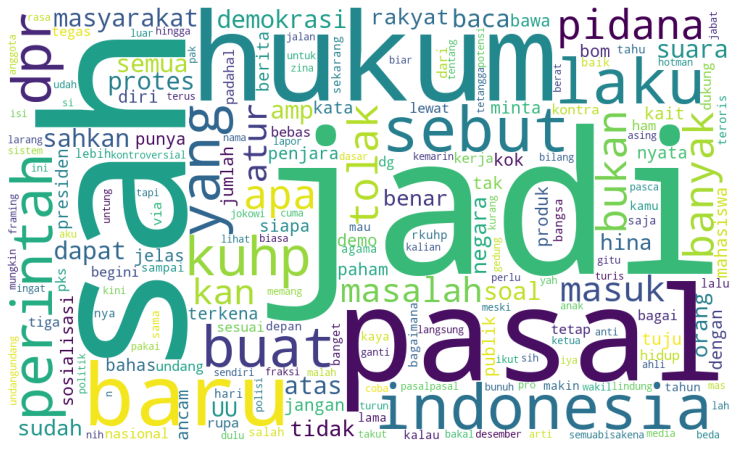

In [20]:
#convert list to string and generate
my_list=tops
# unique_string=(" ").join(my_list)
# wordcloud = WordCloud(width = 1000, height = 500).generate(unique_string)
wordcloud = WordCloud(width = 1000, height = 600, background_color="white").generate(my_list)
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("wordcloud_all"+".png", bbox_inches='tight')
plt.show()
plt.close()

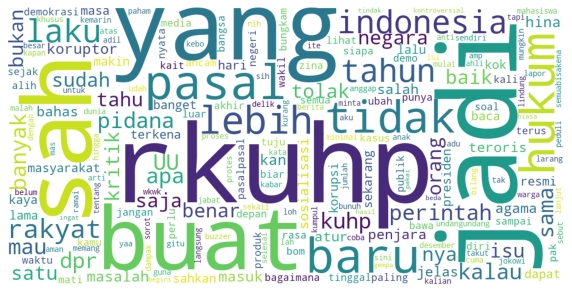

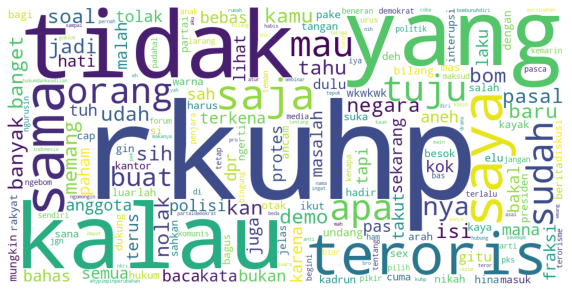

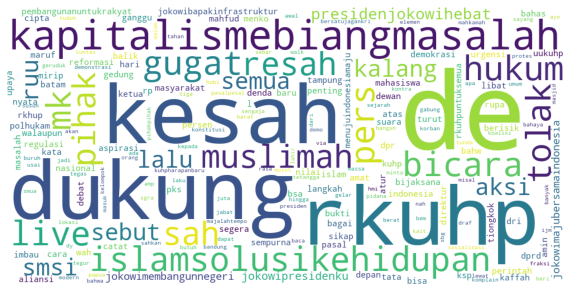

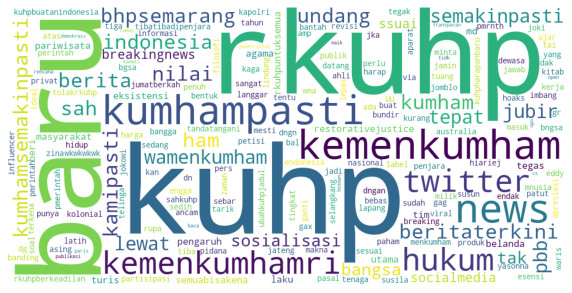

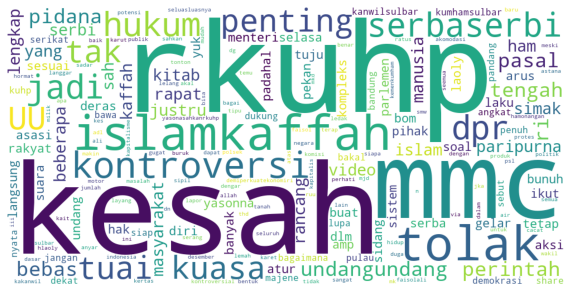

In [21]:
for data in topik:
#     print(data)
    my_list=data
    wordcloud = WordCloud(width = 1000, height = 500, background_color="white").generate(my_list)
    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.savefig("your_file_name"+".png", bbox_inches='tight')
    plt.show()
    plt.close()

In [22]:
dictionary = gensim.corpora.Dictionary.load('dictionary_lda.gensim')
corpus = pickle.load(open('corpus_lda.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('modelLDA_5.gensim')
import pyLDAvis.gensim_models
lda_display = pyLDAvis.gensim_models.prepare(lda, corpus, dictionary, sort_topics=True)
pyLDAvis.display(lda_display)

/home/tsbh/anaconda3/lib/python3.9/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
/home/tsbh/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
/home/tsbh/anaconda3/lib/python3.9/site-packages/past/builtins/misc.py:45: DeprecationWarning: the imp module is deprecated in favour of importlib; see the module's documentation for alternative uses
  from imp import reload
